<a href="https://colab.research.google.com/github/Pogba666/DeepLearning/blob/main/HPE_Lecture_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
%%writefile -a filename.py
import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Use Bing Search v7 resource in Azure
# Cognitive services used to search bing for images without any copyright

subscription_key = "d89f21b980e2419389b23c09ae6c58e6"
search_url = "https://api.bing.microsoft.com/v7.0/images/search"
search_term = "female adult"

Appending to filename.py


In [32]:
%%writefile -a filename.py
headers = {"Ocp-Apim-Subscription-Key" : subscription_key}
params  = {"q": search_term, "license": "public", "imageType": "photo"}

Appending to filename.py


In [33]:
%%writefile -a filename.py
response = requests.get(search_url, headers=headers, params=params)
response.raise_for_status()

Appending to filename.py


In [34]:
%%writefile -a filename.py
searchResults = response.json()
searchResults['currentOffset']

Appending to filename.py


In [35]:
%%writefile -a filename.py
thumbs = [ img for img in searchResults["value"][:10] ]

Appending to filename.py


In [36]:
thumbs

['https://tse4.mm.bing.net/th?id=OIP.IuRHmPprhuq2sFZbqvwLwwHaJ4&pid=Api',
 'https://tse4.mm.bing.net/th?id=OIP.yhVVCyrKb8JSpkkMjbOeCwHaLJ&pid=Api',
 'https://tse2.mm.bing.net/th?id=OIP.y-wcErcZt3mGESCpy126oAHaLH&pid=Api',
 'https://tse1.mm.bing.net/th?id=OIP.hn7rJQ7AnGpri5ZIxji82QDLEy&pid=Api',
 'https://tse2.mm.bing.net/th?id=OIP.RnmNWRuR9Oj3At3lEkXaXQHaLH&pid=Api',
 'https://tse1.mm.bing.net/th?id=OIP.5fdptj-egqi23ewRJWzpxAHaLd&pid=Api',
 'https://tse2.mm.bing.net/th?id=OIP.K8WZ_KebJlgAsyQ4DtvUtAHaLZ&pid=Api',
 'https://tse4.mm.bing.net/th?id=OIP.AP-R0WXjirenxxHEx6KZrQHaJ4&pid=Api',
 'https://tse3.mm.bing.net/th?id=OIP.1xyTxKWOkaUMUUEbyypK-QHaLH&pid=Api',
 'https://tse1.mm.bing.net/th?id=OIP.75GNOACwtHbFtkAW2zh5qAHaLH&pid=Api']

In [37]:
%%writefile -a filename.py
thumbs = [ img['thumbnailUrl'] for img in searchResults["value"][:10] ]
thumbs

Appending to filename.py


In [38]:
# Saving image into Local directory
%%writefile -a filename.py
all_images = []
fname = 0
for thumb in thumbs:
  image = requests.get(thumb)
  image.raise_for_status()
  img = Image.open(BytesIO(image.content)).convert('RGBA')
  all_images.append(img)
  with open('thumb_' + str(fname) + '.png','wb') as f:
      xyz = bytearray(image.content)
      f.write(xyz)
      fname += 1

Appending to filename.py


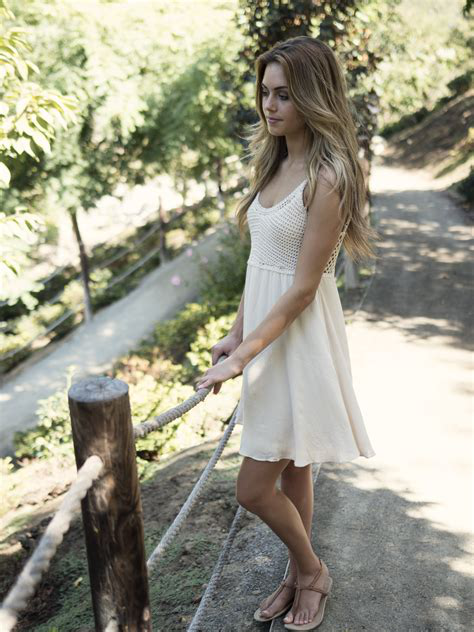

In [39]:
all_images[0]

In [40]:
# Save images into Azure blob for persistaing storage
!pip install azure-storage-blob

In [41]:
%%writefile -a filename.py
import os, uuid
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient, __version__

try:
    print("Azure Blob storage v" + __version__ + " - Python quickstart sample")
    # Quick start code goes here
except Exception as ex:
    print('Exception:')
    print(ex)

Appending to filename.py


In [42]:
%%writefile -a filename.py
connect_str = 'DefaultEndpointsProtocol=https;AccountName=imagesdataage;AccountKey=5tMm9+tu3/rGzT6SXKdlJTOBrSZ9g9Me8Ay/7VF8qnKhReUCJUTav5ldZReYP5AAXN7Tdq8T4ezELwR4mvT0fQ==;EndpointSuffix=core.windows.net'

local_path = "/content"
local_file_name = "/thumb_0.png"
upload_file_path = '/content/thumb_0.png'
upload_file_path

Appending to filename.py


In [43]:
%%writefile -a filename.py
blob_service_client = BlobServiceClient.from_connection_string(connect_str)
container_name = "dog"
blob_client = blob_service_client.get_blob_client(container=container_name, blob=local_file_name)

Appending to filename.py


In [44]:
%%writefile -a filename.py
with open(upload_file_path, "rb") as data:
    blob_client.upload_blob(data)

Appending to filename.py
